In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from desitarget.targetmask import obsconditions
import fitsio
from desitarget.sv3 import sv3_targetmask


In [2]:
file = '/global/cfs/cdirs/desi/users/schlafly/tiling/tiles-4112-packing-20210329-decorated.fits'

In [3]:
new_tiles = Table.read(file)
new_tiles = new_tiles[new_tiles['IN_DESI']==True]

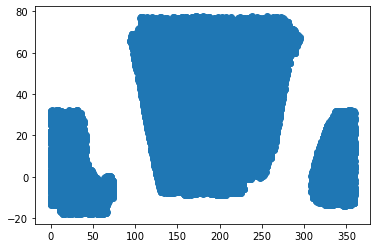

In [4]:
plt.scatter(new_tiles['RA'], new_tiles['DEC'])

In [52]:
new_tiles['TILEID'] = new_tiles['CENTERID']

In [53]:
d = np.zeros(len(new_tiles),
                dtype=[
                    ("TILEID", "i4"),
                    ("RA", "f8"),
                    ("DEC", "f8"),
                    ("OBSCONDITIONS", "i4"),
                    ("IN_DESI", "i2"),
                    ("PASS", "i2"),
                    ("PROGRAM", "S6"),
                ],
            )
d['TILEID'] = new_tiles['TILEID'].copy()
d['RA'] = new_tiles['RA'].copy()
d['DEC'] = new_tiles['DEC'].copy()
d['IN_DESI'][:] = 1
d['PROGRAM'][:] = "SV3"
d['PASS'] = new_tiles['PASS'].copy()
d['OBSCONDITIONS'][:] = obsconditions.mask("GRAY|DARK|BRIGHT")

d = Table(d)

dark_tiles = d[(new_tiles['PROGRAM']=='dark') & (new_tiles['PASS'] < 7)]
bright_tiles = d[(new_tiles['PROGRAM']=='bright') & (new_tiles['PASS']<4)]

In [68]:
dark_tiles.write("patch/inputs/dark_tiles.fits", overwrite=True)
bright_tiles.write("patch/inputs/bright_tiles.fits", overwrite=True)

In [82]:
data = Table.read('patch/inputs/mtl_bright_sv3_onepct.fits')

In [83]:
is_bgs= (data['SV3_DESI_TARGET']&sv3_targetmask.desi_mask['BGS_ANY'])!=0

In [84]:
set(data['NUMOBS_INIT'][is_bgs])

{1}

In [85]:
print(np.count_nonzero(is_bgs))

543433
